In [81]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [82]:
#movie = pd.read_csv('pca.csv')
#movie.head()

In [83]:
#1.Data Filtering
#str_list = []  #empty list to contain columns with strings(words)
#for colname, colvalue in movie.iteritems():
#    if type(colvalue[1])==str:
#        str_list.append(colname)
#get to the numeric columns by inversion
#num_list = movie.columns.difference(str_list)

In [97]:
movie_num = pd.read_csv('pca_2.csv')
movie_num.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,178.0,0.0,855.0,1000.0,4834,0.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,169.0,563.0,1000.0,40000.0,48350,0.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,148.0,0.0,161.0,11000.0,11700,1.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,164.0,22000.0,23000.0,27000.0,106759,0.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,131.0,NaN,131.0,143,0.0,NaN,NaN,12.0,7.1,NaN,0


In [98]:
movie_num = movie_num.fillna(value=0,axis=1)

In [99]:
#Standardization

X = movie_num.values
#Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

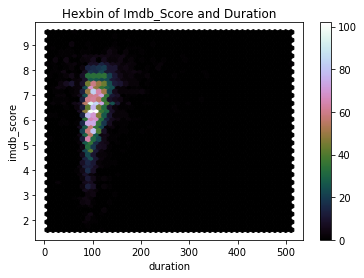

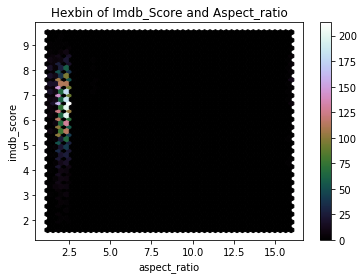

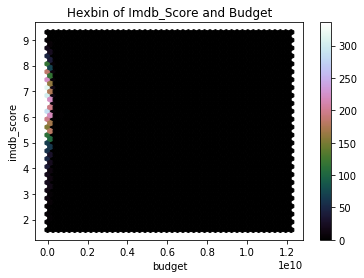

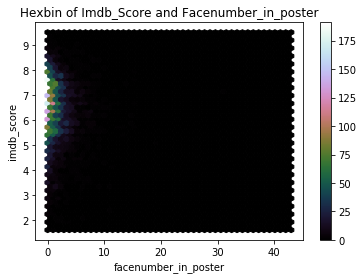

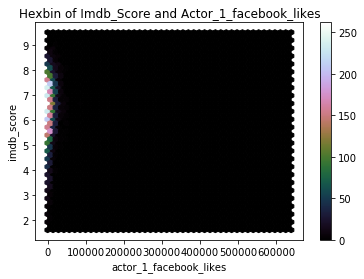

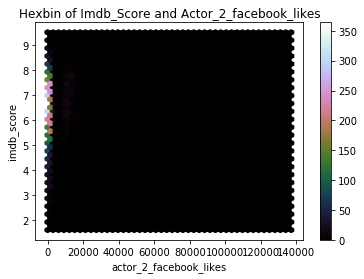

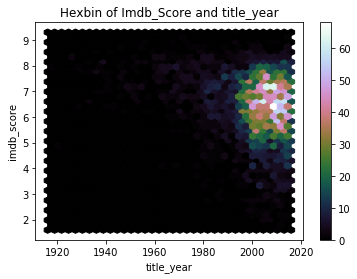

In [100]:
#let's look at some hexbin visualizations first to get a feel for how the correlations between the different features can be
movie.plot(y='imdb_score',x='duration',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Duration')
movie.plot(y='imdb_score',x='aspect_ratio',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Aspect_ratio')
movie.plot(y='imdb_score',x='budget',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Budget')
movie.plot(y='imdb_score',x='facenumber_in_poster',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Facenumber_in_poster')
movie.plot(y='imdb_score',x='actor_1_facebook_likes',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Actor_1_facebook_likes')
movie.plot(y='imdb_score',x='actor_2_facebook_likes',kind='hexbin',gridsize=45,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and Actor_2_facebook_likes')
movie.plot(y='imdb_score',x='title_year',kind='hexbin',gridsize=35,sharex=False,colormap='cubehelix',title='Hexbin of Imdb_Score and title_year')





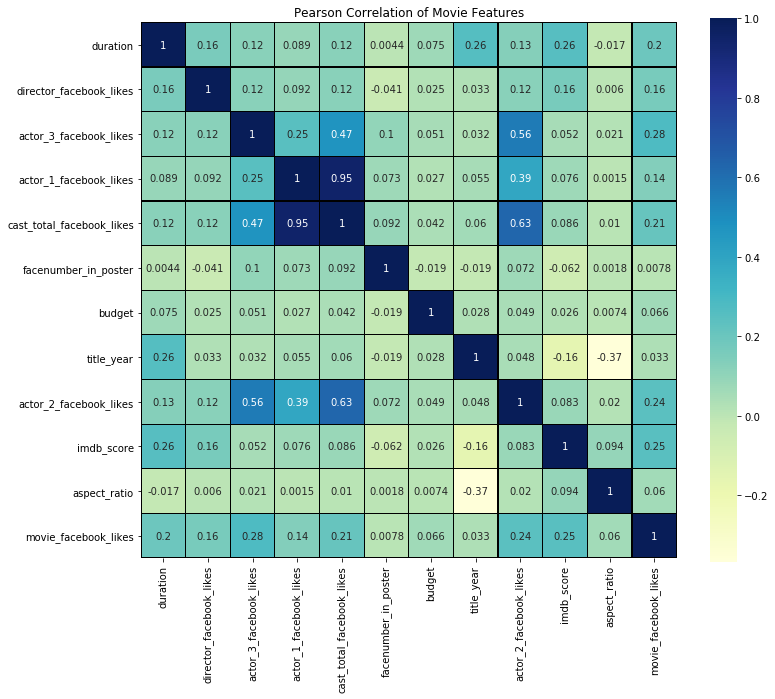

In [101]:
#set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
#Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu",linecolor='black',annot=True)

In [102]:
#2. EXPLAINED VARIANCE MEASURE

#Calculating Eigenvectors and Eigenvalues of Cov matrix
mean_vec = np.mean(X_std,axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [103]:
#Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

#Sort from high to low
eig_pairs.sort(key=lambda x: x[0],reverse=True)

#Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)] #Individual explained variance
cum_var_exp = np.cumsum(var_exp) #cumulative explained variance

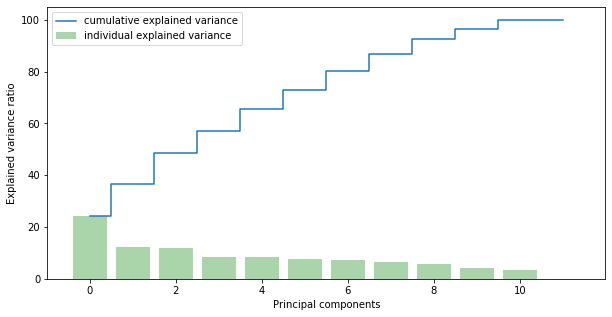

In [104]:
#PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED
plt.figure(figsize=(10,5))
plt.bar(range(12),var_exp,alpha=0.3333,align='center',label='individual explained variance',color='g')
plt.step(range(12), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [105]:
#3. Principal Component Analysis

pca = PCA(n_components=8)
x_8d = pca.fit_transform(X_std)
with open('x_8d.csv','w',newline='') as csvfile:
    fieldnames=['pcomp1','pcomp2','pcomp3','pcomp4','pcomp5','pcomp6','pcomp7','pcomp8']
    writer = csv.writer(csvfile)
    writer.writerows(x_8d)

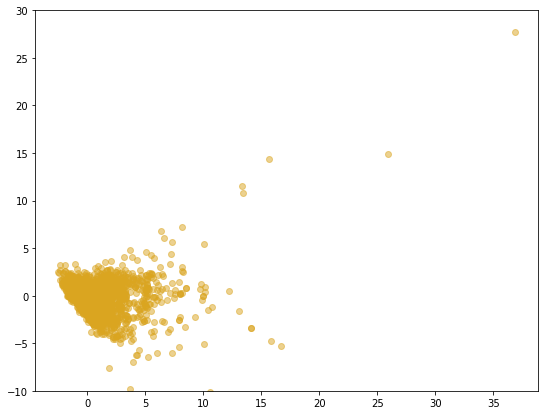

In [45]:
plt.figure(figsize=(9,7))
plt.scatter(x_9d[:,0],x_9d[:,1],c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

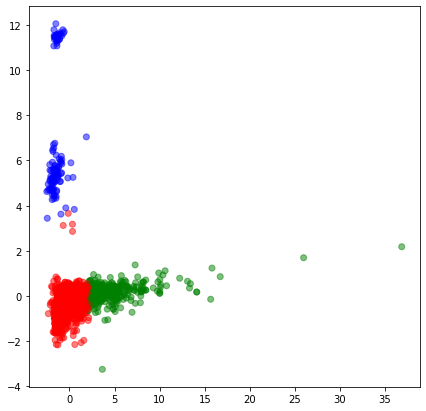

In [46]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

#Define our own color map
LABEL_COLOR_MAP={0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5)
plt.show()

In [42]:
#create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] #only want to visualize relationships between first 3 projections
df['X_cluster'] = X_clustered

c:\users\dionisis\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


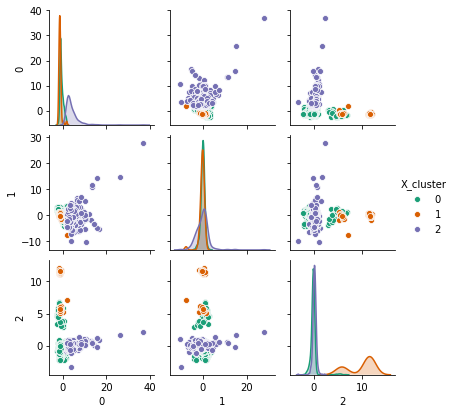

In [43]:
sns.pairplot(df, hue='X_cluster', palette='Dark2', diag_kind='kde', size=1.85)

In [2]:
for i=1:2
    i+1
end

SyntaxError: invalid syntax (<ipython-input-2-3627e0841a6b>, line 1)